In [2]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_parent = "./checkpoint2/gan/gan_poly_ray_SDR_normAll_nosnrclf_bn_dup"
snrs=[35, 30, 25, 20, 15, 10, 5]
seed=0
nsdr=9
acc_snrs=np.zeros((len(snrs),))
for snri in range(len(snrs)):
    snr = snrs[snri]
    acc_sdrs=np.zeros((nsdr,))
    ckp_sdrs={}
    plot_path = path_parent+"/snr"+str(snr)+"/plot/"
    if not os.path.exists(plot_path):
        os.makedirs(plot_path+"/ckp")
        os.makedirs(plot_path+"/time_curve")
    for seed_folder in os.listdir(path_parent+"/snr"+str(snr)):
        if seed_folder[:4] != 'seed':
            continue
        path_ckp = path_parent+"/snr"+str(snr)+"/"+seed_folder+"/ckp/"
        files = os.listdir(path_ckp)
        for file in files:
            if len(file.split("_"))<2:
                continue
            sdr = int(file.split("_")[0][3:])
            if sdr>=nsdr:
                continue
            if sdr not in ckp_sdrs.keys():
                ckp_sdrs[sdr]=['', '']
            val_acc = float(file.split("_")[4][6:])
            if val_acc >= acc_sdrs[sdr]:
                acc_sdrs[sdr] = max(acc_sdrs[sdr], val_acc)
                ckp_sdrs[sdr][0] = seed_folder
                ckp_sdrs[sdr][1] = file
    
    # for sdr in range(nsdr):
    #     shutil.copyfile(path_parent+"/snr"+str(snr)+"/"+ckp_sdrs[sdr][0]+"/ckp/"+ckp_sdrs[sdr][1], plot_path+"ckp/"+ckp_sdrs[sdr][1])
    #     shutil.copyfile(path_parent+"/snr"+str(snr)+"/"+ckp_sdrs[sdr][0]+"/time_curve/time_curve_"+str(sdr)+".npy", plot_path+"/time_curve/time_curve_"+str(sdr)+".npy")

    acc_snrs[snri]=np.mean(acc_sdrs)
    print("snr:{}, average acc:{}%".format(snr, np.round(100*acc_snrs[snri], 2)))

snr:35, average acc:94.75%
snr:30, average acc:93.8%
snr:25, average acc:94.47%
snr:20, average acc:89.95%
snr:15, average acc:83.59%
snr:10, average acc:82.13%
snr:5, average acc:69.0%


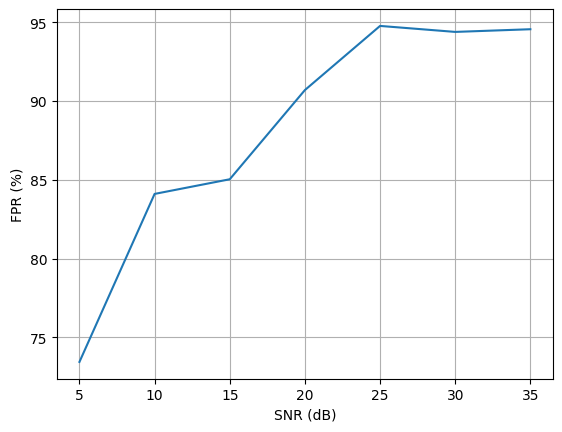

In [4]:
plt.plot(snrs, np.round(100*acc_snrs, 2))
plt.xlabel("SNR (dB)")
plt.ylabel("FPR (%)")
plt.grid()
plt.show()